In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow import math

import matplotlib.pyplot as plt
import numpy as np

In [18]:
!if ! ls /tmp/FOX_train.h5; \
    wget https://storage.gorchilov.net/datasets/fox-multi-factor.tar.gz -O /tmp/FOX.tar.gz && \
    tar -xf /tmp/FOX.tar.gz -C /tmp; \
    end

import h5py

train = h5py.File('/tmp/FOX_train.h5', mode='r')
test = h5py.File('/tmp/FOX_test.h5', mode='r')

train_X = train['data'][:]
train_y = train['labels'][:]

test_X = test['data'][:]
test_y = test['labels'][:]

ls: cannot access '/tmp/FOX_train.h5': No such file or directory
--2021-01-27 13:00:18--  https://storage.gorchilov.net/datasets/fox-multi-factor.tar.gz
Resolving storage.gorchilov.net (storage.gorchilov.net)... 185.97.75.52
Connecting to storage.gorchilov.net (storage.gorchilov.net)|185.97.75.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/gzip]
Saving to: ‘/tmp/FOX.tar.gz’

/tmp/FOX.tar.gz         [    <=>             ]  68.15M  97.4MB/s    in 0.7s    

2021-01-27 13:00:19 (97.4 MB/s) - ‘/tmp/FOX.tar.gz’ saved [71459054]



In [ ]:
clear_session()
model = Sequential([
    LSTM(32, input_shape=(4, 1000)),
    Dense(128, activation='relu'),
    Dense(31, activation='relu')
])
model.summary()

In [9]:
def schedule(epoch, lr) -> float:
    if epoch > 350 and epoch % 25 == 0:
        return lr * math.exp(-0.1)
    return lr
scheduler = LearningRateScheduler(schedule)

In [27]:
%%time
model.compile(optimizer=Adam(lr=1e-3), loss='mse')
history = model.fit(
    train_X, train_y, epochs=1000, callbacks=[scheduler]
)

Epoch 1/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 72050448.0000 - lr: 0.0010
Epoch 2/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71984872.0000 - lr: 0.0010
Epoch 3/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71986664.0000 - lr: 0.0010
Epoch 4/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71989880.0000 - lr: 0.0010
Epoch 5/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71977488.0000 - lr: 0.0010
Epoch 6/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71940344.0000 - lr: 0.0010
Epoch 7/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71903496.0000 - lr: 0.0010
Epoch 8/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71837384.0000 - lr: 0.0010
Epoch 9/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 71769608.0000 - lr: 0.0010
Epoch 10/1000
3125/3125 [==============================

Epoch 155/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 11360187.0000 - lr: 0.0010
Epoch 156/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 11254963.0000 - lr: 0.0010
Epoch 157/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 11148558.0000 - lr: 0.0010
Epoch 158/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 11127226.0000 - lr: 0.0010
Epoch 159/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 11005707.0000 - lr: 0.0010
Epoch 160/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 10924598.0000 - lr: 0.0010
Epoch 161/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 10837671.0000 - lr: 0.0010
Epoch 162/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 10873417.0000 - lr: 0.0010
Epoch 163/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 10674320.0000 - lr: 0.0010
Epoch 164/1000
3125/3125 [===========

3125/3125 [==============================] - 4s 1ms/step - loss: 7567989.0000 - lr: 0.0010
Epoch 233/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7447185.5000 - lr: 0.0010
Epoch 234/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7652754.0000 - lr: 0.0010
Epoch 235/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7411919.5000 - lr: 0.0010
Epoch 236/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7401387.5000 - lr: 0.0010
Epoch 237/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7464666.5000 - lr: 0.0010
Epoch 238/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7410161.0000 - lr: 0.0010
Epoch 239/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7302821.5000 - lr: 0.0010
Epoch 240/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 7408106.0000 - lr: 0.0010
Epoch 241/1000
3125/3125 [==============================] - 4

3125/3125 [==============================] - 4s 1ms/step - loss: 6252025.5000 - lr: 3.6883e-05
Epoch 386/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6207738.5000 - lr: 3.3373e-05
Epoch 387/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6183798.5000 - lr: 3.0197e-05
Epoch 388/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6170565.0000 - lr: 2.7324e-05
Epoch 389/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6192762.0000 - lr: 2.4723e-05
Epoch 390/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6169853.5000 - lr: 2.2371e-05
Epoch 391/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6178033.5000 - lr: 2.0242e-05
Epoch 392/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6169873.0000 - lr: 1.8316e-05
Epoch 393/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6168868.5000 - lr: 1.6573e-05
Epoch 394/1000
3125/3125 

3125/3125 [==============================] - 4s 1ms/step - loss: 6163721.5000 - lr: 2.5110e-11
Epoch 534/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163724.5000 - lr: 2.2720e-11
Epoch 535/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163717.0000 - lr: 2.0558e-11
Epoch 536/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163721.5000 - lr: 1.8602e-11
Epoch 537/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163722.5000 - lr: 1.6832e-11
Epoch 538/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163725.0000 - lr: 1.5230e-11
Epoch 539/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163722.5000 - lr: 1.3781e-11
Epoch 540/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163720.5000 - lr: 1.2469e-11
Epoch 541/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163720.5000 - lr: 1.1283e-11
Epoch 542/1000
3125/3125 

3125/3125 [==============================] - 4s 1ms/step - loss: 6163726.5000 - lr: 1.7095e-17
Epoch 682/1000
3125/3125 [==============================] - 4s 1ms/step - loss: 6163716.0000 - lr: 1.5468e-17
Epoch 683/1000
 818/3125 [======>.......................] - ETA: 2s - loss: 5949646.5000

KeyboardInterrupt: 

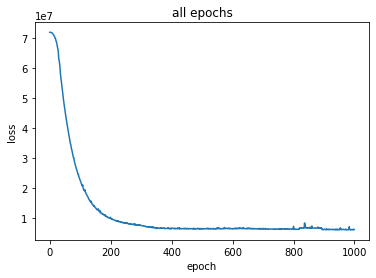

In [10]:
start = 0
end = 1000

plt.title('all epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(range(start, end), history.history['loss'][start:end])
plt.show()

In [28]:
from tensorflow.keras.models import load_model
model = load_model('model_saves/lstm.h5')

model.save('model_saves/lstm.h5')